<a href="https://colab.research.google.com/github/ninadaptegit/pytorchPolynomialRegression/blob/main/pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from torch import nn
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm

# Get the Data as
y = x^2 + 2x + 1 + rand()

In [33]:
X = torch.arange(1,1000).unsqueeze(dim=1)

In [36]:
y = X.pow(2) + 2*X + 1 + torch.rand(X.shape)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

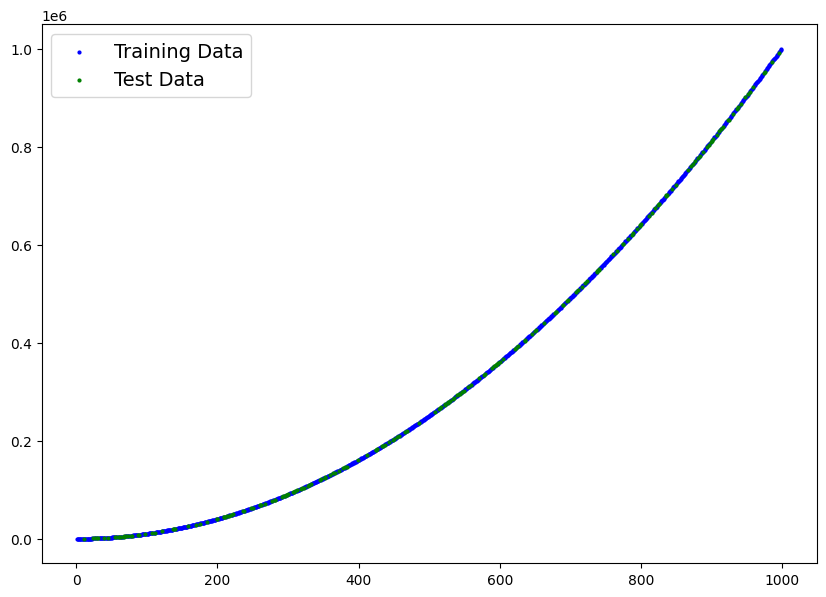

In [45]:
def plot_predictions(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, predictions = None):

  plt.figure(figsize = (10,7))
  plt.scatter(train_data, train_labels, c='b', s=4, label = 'Training Data')
  plt.scatter(test_data, test_labels, c='g',s=4, label = 'Test Data')
  if predictions is not None:
    plt.scatter(test_data, predictions, c='r',s=4, label = 'Predictions')
  plt.legend(prop = {'size':14})

plot_predictions()

In [51]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  def forward(self, x: torch.Tensor)->torch.Tensor:
    return self.weights * x + self.bias



In [52]:
torch.manual_seed(42)
linear_model = LinearRegressionModel()


In [53]:
optimizer = torch.optim.SGD(params = linear_model.parameters(), lr = 0.01)
loss_fn = nn.L1Loss()

In [55]:
epochs = 500
num_epochs = []
train_error = []
test_error = []

for epoch in tqdm(range(epochs)):

  linear_model.train()
  y_pred = linear_model(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  linear_model.eval()
  with torch.inference_mode():
    test_pred = linear_model(X_test)
    test_loss = loss_fn(test_pred, y_test)
    if epoch%10==0:
      num_epochs.append(epoch)
      train_error.append(loss)
      test_error.append(test_loss)



  0%|          | 0/500 [00:00<?, ?it/s]

In [56]:
linear_predictions = linear_model(X_test)


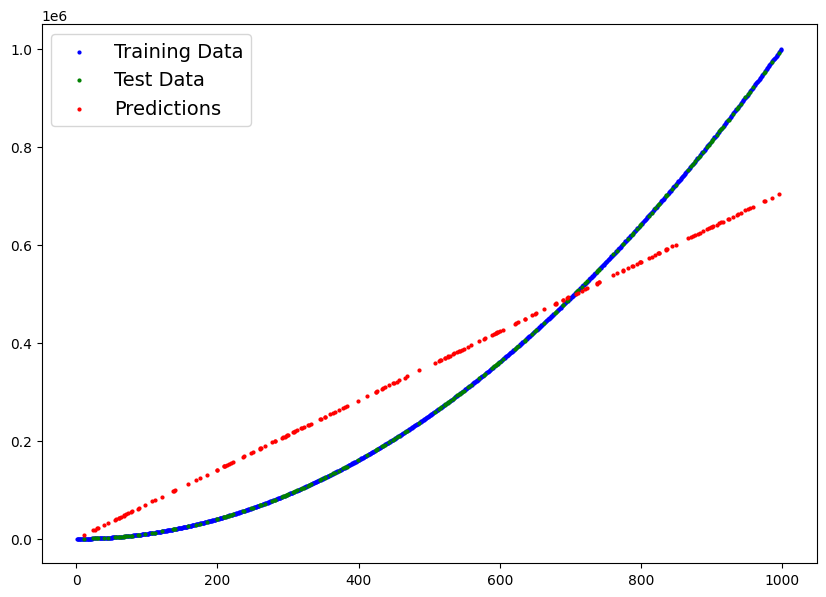

In [58]:
plot_predictions(predictions = linear_predictions.detach())

In [166]:
X_train = X_train.float()
X_test = X_test.float()

In [167]:
class PolynomialModel(nn.Module):
  def __init__(self , power):
    super().__init__()
    self.power = power
    self.weights = nn.Parameter(torch.randn(size = (power+1,1),requires_grad=True,dtype=torch.float))
  def forward(self,X:torch.tensor)->torch.tensor:
    ans = torch.zeros_like(X,dtype=torch.float)
    for i in range(0,self.power+1):
      ans += self.weights[i] * X.pow(i)
    return ans

In [168]:
torch.manual_seed(42)
polynomial_model = PolynomialModel(power = 2)


In [169]:
optimizer_poly = torch.optim.SGD(params = polynomial_model.parameters(), lr = 0.01)
loss_fn_poly = nn.MSELoss()

In [174]:
epochs = 500
poly_epochs = []
poly_train_loss = []
poly_test_loss = []
X_train_scaled = (X_train-X_train.mean())/X_train.std()
X_test_scaled = (X_test-X_train.mean())/X_train.std()

for epoch in tqdm(range(epochs)):
  polynomial_model.train()
  y_pred = polynomial_model(X_train_scaled)
  loss_poly = loss_fn_poly(y_pred, y_train)
  optimizer_poly.zero_grad()
  loss_poly.backward()
  optimizer_poly.step()

  polynomial_model.eval()
  with torch.inference_mode():
    test_pred = polynomial_model(X_test_scaled)
    test_loss = loss_fn_poly(test_pred, y_test)
  if epoch%10==0:
    poly_epochs.append(epoch)
    poly_train_loss.append(loss_poly)
    poly_test_loss.append(test_loss)
  if epoch%100 == 0:
    print(f"Epoch: {epoch} | Train Loss: {loss_poly} | Test Loss: {test_loss}")


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch: 0 | Train Loss: 20347.04296875 | Test Loss: 19749.298828125
Epoch: 100 | Train Loss: 5589.17041015625 | Test Loss: 5422.02734375
Epoch: 200 | Train Loss: 1535.8740234375 | Test Loss: 1487.9403076171875
Epoch: 300 | Train Loss: 422.4597473144531 | Test Loss: 408.6645202636719
Epoch: 400 | Train Loss: 116.92766571044922 | Test Loss: 112.68701934814453


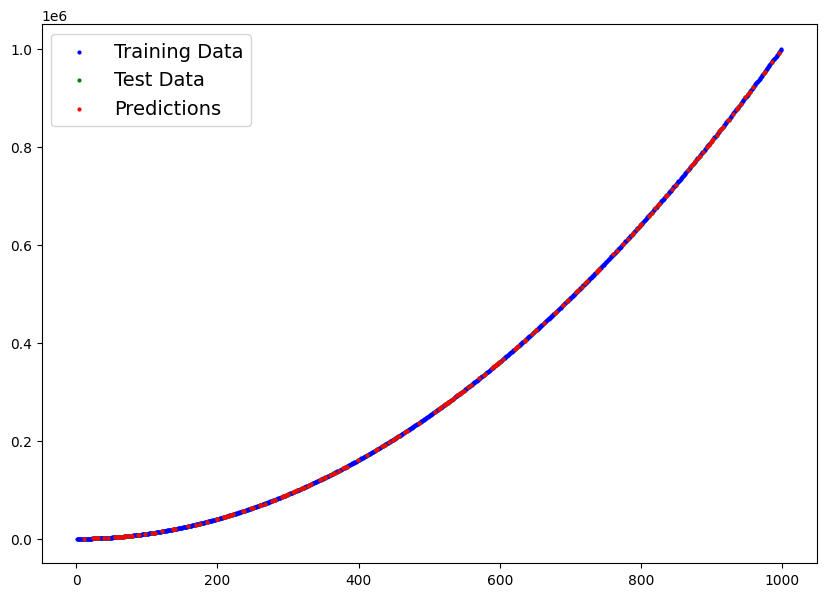

In [175]:

poly_predictions = polynomial_model(X_test_scaled)
plot_predictions(predictions = poly_predictions.detach())

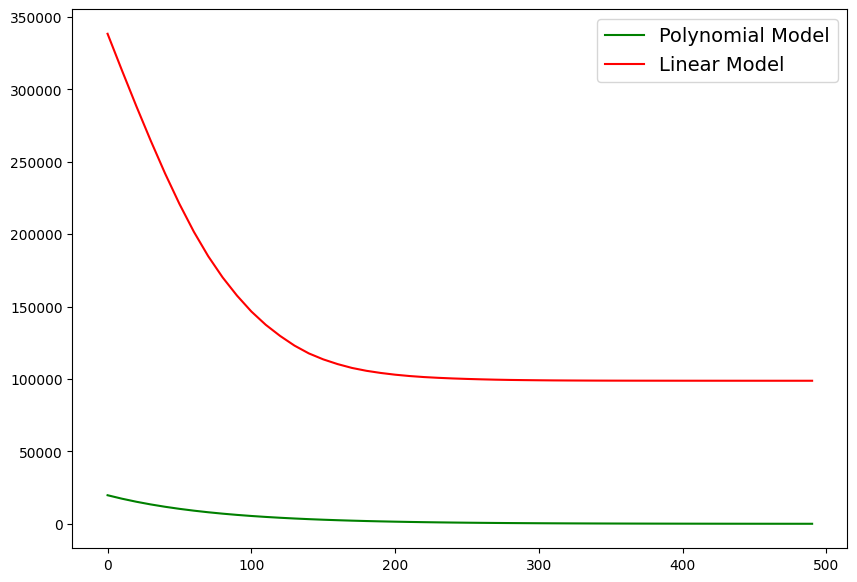

In [178]:
plt.figure(figsize = (10,7))
plt.plot(num_epochs, poly_test_loss , c = 'g',label = 'Polynomial Model')
plt.plot(num_epochs , test_error , c = 'r', label = 'Linear Model' )
plt.legend(prop = {'size':14})